# Python Final Project: Sentiment Analysis on Balloon Takedown Opinion Pieces

# By Jackson Dalman

This research project analyzes the sentiment of several opinion pieces from across the political spectrum regarding the February 2023 military operation that resulted in an American F-22 fighter jet shooting down a Chinese surveillance balloon off the coast of South Carolina. The Biden Administration's decision to wait until after the balloon had crossed the entirety of the country from Montana to South Carolina was the subject of fierce debate, with some extolling the wisdom of the decision while others fiercely attack the decision to wait to shoot it down. I sought to explore how the political leanings of publications and authors of opinion pieces about the incident correlated with the sentiment of their writing. Competition with China seems to be one of the few areas of agreement between both Republicans and Democrats, so it would be interesting to see if the sentiments of their reactions would be similar or if political polarization meant the differences in the sentiments of their reaction would fall along a party divide. My research question was: did the background political leanings of an opinion piece regarding the balloon incident meaningfully contribute to a difference in the sentiment of the writing?

My hypothesis was that the political leanings of the author and publication would influence the sentiment of the opinion pieces published in response. Specifically, I hypothesized that opinion pieces that originated from conservative authors and publications would produce a more negative sentiment score, and pieces that originated from more left-leaning publications would have a more positive sentiment score. Even though conservatives tend to be more supportive of aggressive acts like shooting down a rival’s surveillance aircraft, I anticipated polarization would mean they would be more critical of an action by the Biden Administration. Along those lines, I anticipated the sentiment score of pieces from a left-leaning background would be more positive in support of the Democratic administration.

An ancillary research question I wanted to explore was how the sentiment of pieces would vary within the more extreme and moderate wings of both left and right. Would an event like this unify sentiments between moderates and more extreme members of ideological groups? I hypothesized that it would probably be more unifying, as measured by sentiment, for conservatives than for liberals or those belonging to the left side of the political spectrum. It is easier to maintain unity when in opposition, like conservatives are, than it is when making the hard choices required of governing like the left is. That being said, the chaotic election for Speaker of the House of Representatives earlier this year shows than simply being in opposition does not guarantee unity by any means. 

This study was important because China policy is often held up as a potential area of cooperation between Republican and Democrats. If an event like this, an aggressive military strike against a Chinese military aircraft clearly violating U.S. airspace, could not foment a sense of unity, it is hard to imagine what would. At the very least, it might be able to demonstrate some intra-party unifying power.

Before I performed any sort of data harvesting or analysis, I had to identify which data sources I would use. I tried to find opinion pieces from across the political spectrum, from hard right sources, moderate right sources, moderate left sources, and hard left sources. Furthermore, the opinion pieces had to specifically be responding to the act of shooting down the balloon to be consistent, so other related opinion pieces that simply talked about the balloon or what it represented had to be set aside. In the end, I settled on the following categories and respective nine pieces:
•	Hard Right
    o	Fox News, Michael R. Pompeo, “China spy balloon fiasco exposed Biden's astonishing weakness and Xi will drive a truck through it”
    o	Fox News, Representative Michael Waltz (R-FL), “Chinese spy balloon is a Sputnik moment for America”
•	Moderate Right
    o	Wall Street Journal, Editorial Board, “Biden’s Hot Air About Spy Balloons”
    o	Hudson Institute, Arthur Herman, “Balloons, Biden, and American Power”
•	Moderate Left
    o	Council on Foreign Relations, David Sacks, “What China’s Surveillance Balloon Says About U.S.-China Relations”
    o	CNN, Julian Zelizer, “Opinion: Biden’s ‘no apologies’ talk is a good start”
    o	CNN, Beth Sanner, “Opinion: What would China have done?”
•	Hard Left
    o	MSNBC, Steve Benen, “Pentagon shoots down Chinese balloon, GOP claims on the same day”
    o	Jacobin, Branco Marcetic, “Only US Warmakers Could Create a Panic as Absurd as the “Spy Balloon” Fiasco”

I validated my political categorizations by checking the media bias rankings of AllSides, which identify the political orientation of publications (AllSides Media Bias Rankings, https://www.allsides.com/media-bias/ratings).

First I imported the libraries I needed.

In [1]:
#conda install requests


In [2]:
#pip install beautifulsoup4


In [3]:
#conda install -c conda-forge wordcloud


In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jacksondalman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import requests


In [6]:
from bs4 import BeautifulSoup


In [7]:
import pandas as pd


In [8]:
from nltk.corpus import stopwords
stops = stopwords.words('english')

from nltk import pos_tag
from nltk.corpus import wordnet 
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud    
import matplotlib.pyplot as plt

import glob

After identifying which opinion pieces I wanted to analyze, I prepared to perform web scraping from the articles. I created a .csv file with each of the pieces, ordered by hard right from the top row to hard left in the bottom row, with columns for publication, author, headline, and URL. I then read in my .csv file into a pandas dataframe entitled “articles_df”. I received an error when I tried to use UTF-8 encoding like we did in class, but I found a fix on stackoverflow that suggested using ISO-8859-1 encoding instead, which made it work (stackoverflow, https://stackoverflow.com/questions/19699367/for-line-in-results-in-unicodedecodeerror-utf-8-codec-cant-decode-byte)

In [9]:
#adapted from our web scraping class and above link.
articles_df= pd.read_csv("balloonarticles2.csv", delimiter=',', encoding='ISO-8859-1')

Then I defined a function that would scrape the text from each URL in the dataframe and add it to another column, and ran the function on the articles_df dataframe.

In [10]:
#adapted from our web scraping class
def scrape_article(url):
    response = requests.get(url)
    response.encoding = 'ISO-8859-1'
    html_string = response.text
    return html_string

In [11]:
#adapted from our web scraping class
articles_df['text'] = articles_df['URL'].apply(scrape_article)

Once I had the text scraped, I created a for loop that applied BeautifulSoup to each of the texts to clean them up and printed it. After I validated it worked, I ran it again and wrote the results onto a single .txt file entitled all_articles.txt.

In [12]:
#adapted from our web scraping class
for text in articles_df['text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()

In [13]:
articles_df

,ï»¿publication,headline,author,URL,text
0,Fox News,China spy balloon fiasco exposed Biden's aston...,Michael R. Pompeo,https://www.foxnews.com/opinion/china-spy-ball...,"<!doctype html>\n<html data-n-head-ssr lang=""e..."
1,Fox News,Chinese spy balloon is a Sputnik moment for Am...,Rep. Michael Waltz,https://www.foxnews.com/opinion/chinese-spy-ba...,"<!doctype html>\n<html data-n-head-ssr lang=""e..."
2,Wall Street Journal,Bidenâs Hot Air About Spy Balloons,Editorial Board,https://www.wsj.com/articles/chinese-spy-ballo...,\n <!doctype html><!--GRAND CANYON PREBID -->...
3,Hudson Institute,"Balloons, Biden, and American Power",Arthur Herman,https://www.hudson.org/national-security-defen...,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pre..."
4,Council on Foreign Relations,What Chinaâs Surveillance Balloon Says About...,David Sacks,https://www.cfr.org/blog/what-chinas-surveilla...,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pre..."
5,CNN,Opinion: Bidenâs âno apologiesâ talk is ...,Julian Zelizer,https://www.cnn.com/2023/02/16/opinions/biden-...,"<!DOCTYPE html>\n<html lang=""en"" data-uri=""c..."
6,CNN,Opinion: What would China have done?,Beth Sanner,https://www.cnn.com/2023/02/07/opinions/spy-ba...,"<!DOCTYPE html>\n<html lang=""en"" data-uri=""c..."
7,MSNBC,"Pentagon shoots down Chinese balloon, GOP clai...",Steve Benen,https://www.msnbc.com/rachel-maddow-show/maddo...,"<!DOCTYPE html><html lang=""en""><head><link hre..."
8,Jacobin,Only US Warmakers Could Create a Panic as Absu...,Branco Marcetic,https://jacobin.com/2023/02/china-spy-balloon-...,\n\n \n \n \n\n \n\n \n \n \n \n \n\n...


In [14]:
#adapted from our web scraping class
with open("all_articles.txt","w") as file:
    for text in articles_df['text']:
        soup = BeautifulSoup(text)
        article = soup.get_text()
        file.write(article)
        

Once I was able to write them into a single file, I wanted to write each of the cleaned texts into their own .txt files in a “files” folder. I could have used ! mkdir files to create the folder, but I actually just used the GUI to create it beforehand. I created an index that started at 0 and used an f-string to iterate across the articles in the dataframe, creating new files named article_1.txt, article_2.txt and so on.

In [15]:
#adapted from our web scraping class
id = 0
for text in articles_df['text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()
    
    id += 1
    with open(f"files/article_{id}.txt", "w") as file:
        file.write(str(article))

I created two new folders, “files_cleaned” and “wordclouds” (with the GUI), and used Glob library to turn my file directory into a list of filepaths.

In [16]:
#adapted from our web scraping class
directory = "files"
files = glob.glob(f"{directory}/*.txt")

In [17]:
files

['files/article_7.txt',
 'files/article_6.txt',
 'files/article_4.txt',
 'files/article_5.txt',
 'files/article_1.txt',
 'files/article_2.txt',
 'files/article_3.txt',
 'files/article_8.txt',
 'files/article_9.txt']

I created a function that derives the part of speech of given words, which I will use for lemmatizing words later.

In [18]:
#adapted from our web scraping class
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

Then I created a new function that iterated across each file to create a “clean” version of each .txt file, where I transformed the words into NLTK tokens and used NLTK to remove punctuation, stop words, and lemmatized the tokens.

From the cleaned text files I created word clouds and analyzed lexical density of the articles. Most of the word clouds or lexical densities were very similar.


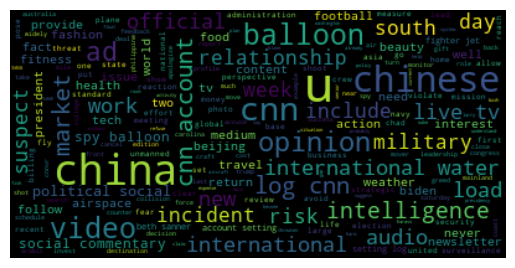

0.6483333333333333


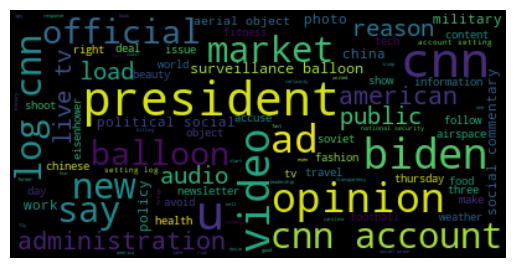

0.67


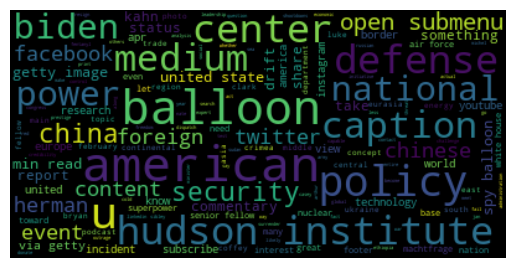

0.5733333333333334


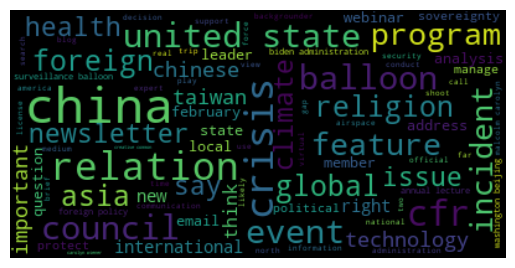

0.5816666666666667


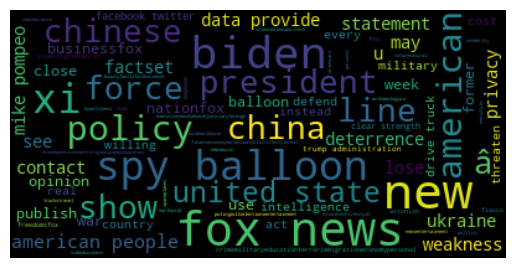

0.6616666666666666


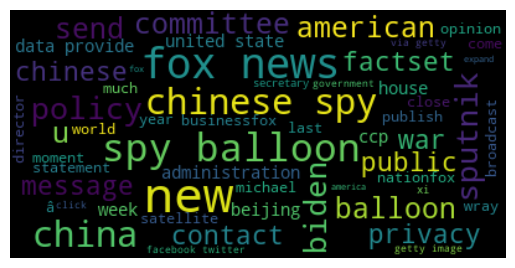

0.6883333333333334


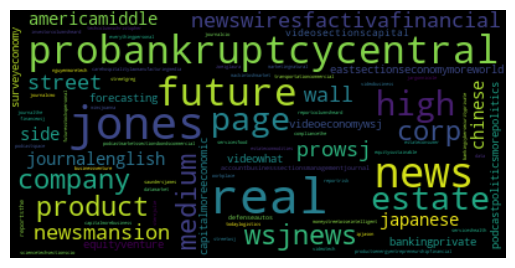

0.6511156186612576


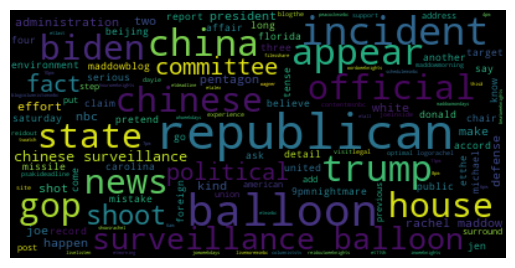

0.7104377104377104


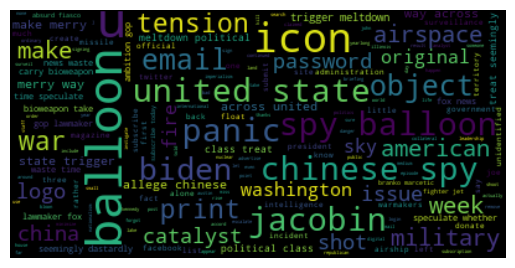

0.63
[{'File_name': 'files/article_7.txt', 'lexical_density': 0.6483333333333333}, {'File_name': 'files/article_6.txt', 'lexical_density': 0.67}, {'File_name': 'files/article_4.txt', 'lexical_density': 0.5733333333333334}, {'File_name': 'files/article_5.txt', 'lexical_density': 0.5816666666666667}, {'File_name': 'files/article_1.txt', 'lexical_density': 0.6616666666666666}, {'File_name': 'files/article_2.txt', 'lexical_density': 0.6883333333333334}, {'File_name': 'files/article_3.txt', 'lexical_density': 0.6511156186612576}, {'File_name': 'files/article_8.txt', 'lexical_density': 0.7104377104377104}, {'File_name': 'files/article_9.txt', 'lexical_density': 0.63}]


In [19]:
# adapted from our web scraping class
id = 0
lexical_density = []  
for filepath in files:
    text = open(filepath, encoding='ISO-8859-1').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]
    
# save cleaned files

    id += 1
    with open(f"files_cleaned/article_cleaned_{id}.txt", "w") as file:
        file.write(str(text_clean))
        
# create Word Clouds

    unique_string=(" ").join(text_clean)
    wordcloud = WordCloud(max_font_size=40).generate(unique_string)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# save Word Clouds

    id += 1
    wordcloud.to_file(f"wordclouds/word_cloud_{id}.png")

# Establish lexical density

    text_clean_slice = text_clean [0:600]
    ld_results = len(set(text_clean_slice)) / len(text_clean_slice)
    print(ld_results)
    ld_dict = {'File_name': filepath, 'lexical_density': ld_results}
    lexical_density.append(ld_dict)

print(lexical_density)

In [20]:
# adapted from our web scraping class
ld_df = pd.DataFrame(lexical_density)
ld_df = ld_df.sort_values(by='File_name', ascending=True)
ld_df

,File_name,lexical_density
4,files/article_1.txt,0.661667
5,files/article_2.txt,0.688333
6,files/article_3.txt,0.651116
2,files/article_4.txt,0.573333
3,files/article_5.txt,0.581667
1,files/article_6.txt,0.670000
0,files/article_7.txt,0.648333
7,files/article_8.txt,0.710438
8,files/article_9.txt,0.630000


Next came the sentiment analysis. After some consideration I decided that instead of using the new “cleaned” text files where I removed punctuation, stop words, and lemmatized the words, I wanted to use the original .txt files I created. This way, I would be able to perform sentiment analysis on complete sentences within the article as well as the entire article. So I went back and did some extra manual cleaning of the original .txt files in the “files” folder to use in my sentiment analysis, because there was still a lot of extraneous text. I actually tried doing this without doing the manual cleaning of extraneous text and the results were very different. I stored the files with additional manual cleaning in a folder called "files_real" and used that folder in the below code. I went ahead and imported VADER sentiment analyzer and initialized it.

In [41]:
#adapted from our sentiment analysis class
pd.options.display.max_colwidth = 1000
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyzer = SentimentIntensityAnalyzer()
folder_path = "/Users/jacksondalman/Desktop/files_real"


I went ahead and created a new empty list named df_list. Df_list is where I would combine all of the individual data frames for each text file into an overarching list that contained each article’s individual dataframe. Then, I created a for loop that iterated across each of the .txt files. First, the function read the .txt file and used NLTK to split the text into sentences. Then, it created a dataframe for the sentences in the text file and performed sentiment analysis on each sentence, showing the sentiment score in a new column. Finally, it appended the new dataframe to df_list.

In [42]:
df_list = []
# adapted from web scraping class
# iterate over the text files
for i in range(1, 10):
    # read in the text file
    with open(f"/Users/jacksondalman/Desktop/files_real/article_{i}.txt", "r") as file:
        text = file.read()
        
    # adapted from sentiment analysis class
    # split the text into sentences
    sentences = nltk.sent_tokenize(text)
    
    # adapted from sentiment analysis class
    # create a DataFrame for the sentences in the text file
    sentence_scores = []
    for number, sentence in enumerate(sentences):
        scores = sentimentAnalyzer.polarity_scores(sentence)
        sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})
    df = pd.DataFrame(sentence_scores)
    
    # append the DataFrame to the list
    df_list.append(df)

Here I print out article 8 from df_list just to show that it works.

In [43]:
df_list[8]

,sentence,sentence_number,sentiment_score
0,\n\n\n\nOnly US Warmakers Could Create a Panic as Absurd as the âSpy Balloonâ Fiasco\n\n\nBy\n\n\n Branko Marcetic\n \n\n\n\nThe US government and media instigate international fearmongering and saber-rattling on a regular basis.,1,-0.6705
1,"But the recent Chinese spy balloon incident belongs in the Hall of Fame as one of the most idiotic panics by a jittery, trigger-happy warfare state.",2,-0.8610
2,"Ever since an alleged Chinese spy balloon made its merry way across the United States, triggering a full-on meltdown from the political class, weâve been treated to seemingly around-the-clock panic-mongering about Chinaâs dastardly balloon ambitions.",3,0.7430
3,GOP lawmakers and Fox News wasted no time in speculating whether the balloon was carrying a bioweapon (âDid it take off from Wuhan?â).,4,-0.6597
4,"The balloon was a prelude to Chinese mobilization for World War III, we heard from China âexpertâ Gordon Chang, who suggested it âseems more than accidentalâ this was happening three weeks out from the anniversary of Russiaâs invasion of Ukraine.",5,-0.5994
5,"In fact, Chinaâs game was possibly to make the United States shoot it down, said retired House Republican Adam Kinzinger, so they could âevaluate high altitude capabilities of certain fighters.â Actually, no, it was there to âsurveil strategic sites in the continental United States,â defense secretary Lloyd Austin informed us.",6,0.7003
6,Republicans widely criticized President Joe Biden for not blowing the balloon out of the sky earlier.,7,-0.3612
7,The panic only continued once the military shot down three more unidentified objects in the sky last week.,8,-0.5106
8,âCould they say with assurance that that payload under the balloon .,9,0.3400
9,. . did not contain a nuclear weapon?â uber-hawk John Bolton asked on CNN.,10,0.0000


Afterwards, I generated the compound scores of the entire articles. First I created a list to help store the compound scores. Then I created a for loop for each dataframe in df_list where I combined all the sentences in the dataframe into a single string, calculated the sentiment score for the whole string of sentences to get a compound score, and then appended the compound score to the compound_score list. I also created a new column for each dataframe within df_list to show the compound score of that individual dataframe.

In [44]:
compound_scores=[]

In [45]:
#adapted from sentiment analysis class and "How to combine multiple rows of strings into one using pandas?" 
# by Include Help, at https://www.includehelp.com/python/how-to-combine-multiple-rows-of-strings-into-one-using-pandas.aspx
for df in df_list:
    sentences = ' '.join(df['sentence'])
    sentiment_scores = sentimentAnalyzer.polarity_scores(sentences)
    compound_scores.append(sentiment_scores['compound'])

In [46]:
# inspired by "Pandas Loop through list of Data Frames and Change Index" at stackoverflow, at
# "https://stackoverflow.com/questions/44630805/pandas-loop-through-list-of-data-frames-and-change-index"
for i, df in enumerate(df_list):
    df['compound_score'] = compound_scores[i]

In [47]:
df_list[1]

,sentence,sentence_number,sentiment_score,compound_score
0,"Chinese spy balloon is a Sputnik moment for America\nLike Sputnik, the Chinese spy balloon has drastically changed Americans' sense of security\n\nIn 1957, the sense of security the United States had come to accept after America’s victory in World War II drastically changed.",1,0.7783,0.7193
1,"The NBC radio broadcast on the night of Oct. 4 told its audience, ""Listen now… for the sound that forevermore separates the old from the new,"" as the sound of the Sputnik satellite came through the airwaves.",2,0.0000,0.7193
2,This moment didn’t just signify a groundbreaking technological achievement with the launch of the first satellite into orbit.,3,0.0000,0.7193
3,It also conveyed to the rest of the world the Soviet Union was outpacing the United States technologically a decade into the Cold War.,4,-0.2732,0.7193
4,The American public was shocked to the point of panic.,5,-0.6808,0.7193
5,They were certainly put on notice about the seriousness of the Soviet Union as a rival.,6,0.2960,0.7193
6,A silver lining in the Biden administration allowing the Chinese spy balloon to violate our airspace is that the American public has received a similar wake-up call to the brazenness of Chinese spying.,7,-0.4939,0.7193
7,"As a member of the House Armed Services Committee and Intelligence Committee, I can tell you the United States has been under an espionage assault from China for years, but much of it has been behind the scenes.",8,0.1406,0.7193
8,They didn’t need to send a balloon given their rapidly expanding constellation of spy satellites.,9,0.0000,0.7193
9,But I’m glad they did.,10,0.6124,0.7193


Next I created a new dataframe called df_compound to store the compound scores, and printed out df_compound to see the results. 

In [48]:
#inspired by sentiment analysis class
df_compound = pd.DataFrame({'compound_score': compound_scores})

In [49]:
df_compound

,compound_score
0,-0.9904
1,0.7193
2,-0.5946
3,-0.9887
4,-0.9892
5,-0.9847
6,-0.9976
7,-0.9592
8,-0.9990


From df_compound I created a bar graph to visualize the compound score of each article. In the graph, the articles are sorted from conservative to liberal/leftist, with hard right starting at index number 0 and hard left on the other end at index number 8.

<AxesSubplot:title={'center':'Sentiment of conservative, centrist and liberal op-eds about the shooting down of the balloon'}>

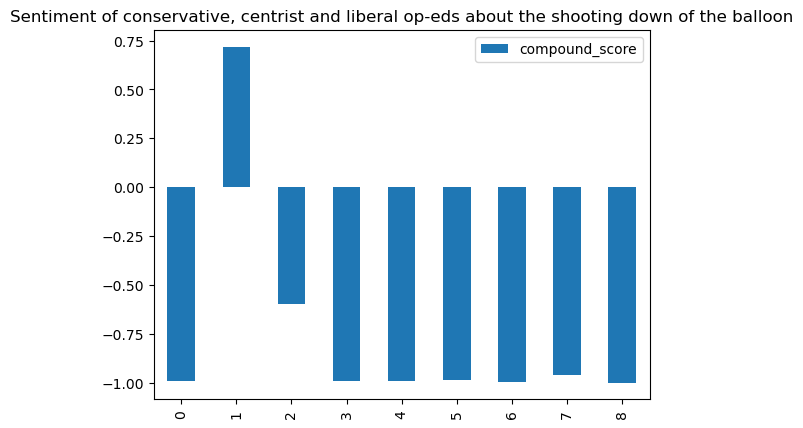

In [50]:
#adapted from our principles of data analysis class
df_compound.plot(kind='bar', title='Sentiment of conservative, centrist and liberal op-eds about the shooting down of the balloon')

The results were surprising to me. Seven out of the nine articles had very negative sentiment scores, and there was only one article with a moderately negative sentiment score and only one with a positive sentiment score. Even more surprising to me, the two articles that had the relatively higher sentiment scores were from conservative publications and authors. After examining the individual sentence sentiment scores for those two articles, I believe I understand why these results came out the way they did. 

Article 1, the only article with a positive sentiment, was the Fox News opinion piece written by China hawk Rep. Michael Waltz (R-FL). In his article, he condemns the Biden Administration, but he also tries to spin the episode as a “Sputnik moment” for America. He uses theatrical, lofty language and tries to frame the situation as a wake-up call for America to compete with China just as Sputnik was a wake-up call for the U.S. to compete with the Soviet Union in space. Article 2, the article with a moderately negative sentiment score, was the opinion piece by the Wall Street Journal’s Editorial Board. That article uses a lot of direct quotations from U.S. military and government officials, who tended to use more positive language to defend the decisions of the Administration.
Upon further review, one can see why all the other articles received such negative scores. While the conservative leaning publications predictably attacked the decision of the Biden Administration of waiting to shoot the balloon down, the liberal/leftist publication tended to attack conservatives for criticizing the Administration for doing what it thought it needed to do. The Jacobin article (far left) criticized warmongers in both parties for creating a needless frenzy. 

I originally hypothesized that the political leanings of the opinion piece authors and publishers would affect the sentiment score, and specifically conservative pieces would score more negatively and liberal/leftist pieces would score more positively. The results show that my hypothesis was wrong, and that seven out of the nine articles spanning the political spectrum received very low sentiment scores, and in fact the two exceptions that received slightly higher scores came from the conservative pool of articles. These results do not imply, however, that those conservative authors were supportive of the operation and the rest were opposed. Rather, they just reflect the writing tone of the articles: liberal commentators used negative language to criticize conservatives for attacking Biden over the operation, and the two higher conservative scores either tried to spin it as a wake-up call for America or quoted heavily from official U.S. government sources. Also, there was no discernable pattern of unity within the conservative ideological camp, but all the liberal/leftist articles received very negative scores. 

While this project may not have answered my question in the way I intended, it did reveal how the tone of writing about this incident was largely negative across the political spectrum, regardless of whether the authors and publications supported the decision or not.